<a href="https://colab.research.google.com/github/jllucini/pyTorch_Resources/blob/main/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [15]:
# Import necessary libraries
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__


'1.12.1+cu113'

In [17]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [27]:
# Create the data parameters
weight = 0.3
bias = 0.9

# Make X and y using linear regression feature
start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step)
y = weight * X + bias 

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")
print(f"Last 10 X & y samples:\nX: {X[-10:]}\ny: {y[-10:]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
Last 10 X & y samples:
X: tensor([0.9000, 0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800,
        0.9900])
y: tensor([1.1700, 1.1730, 1.1760, 1.1790, 1.1820, 1.1850, 1.1880, 1.1910, 1.1940,
        1.1970])


In [26]:
# Split the data into training and testing
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(80, 80, 20, 20)

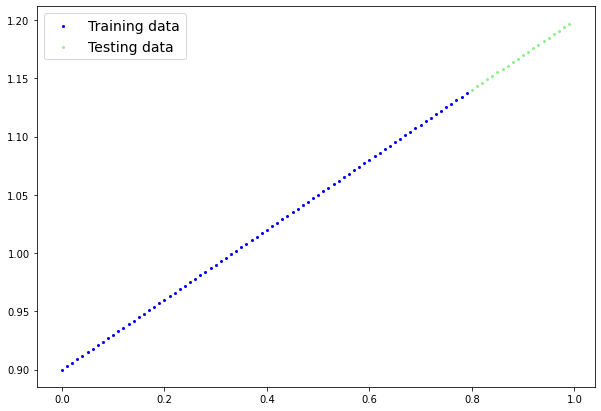

In [23]:
# Plot function
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="lightgreen", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

# Plot the training and testing data 
plot_predictions();


## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [50]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float
        ))

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float
        ))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias

In [58]:
# Instantiate the model and put it to the target device
torch.manual_seed(20)
ex01LRmodel = LinearRegressionModel()
ex01LRmodel.to(device)

# Check model device
next(ex01LRmodel.parameters()).device

device(type='cuda', index=0)

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [59]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=ex01LRmodel.parameters(),
                            lr=0.01)


In [60]:
# Training loop


# Train model for 300 epochs
epochs=600

# Send data to target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ### TRAINING

  # Put model in train mode
  ex01LRmodel.train()  

  # 1. Forward pass
  y_pred = ex01LRmodel(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)
  
  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### TESTING every 20 epochs
  if epoch % 20 == 0:

      # Put model in evaluation mode and setup inference context 
      ex01LRmodel.eval()

      # 1. Forward pass
      with torch.inference_mode():
        test_pred = ex01LRmodel(X_test)

        # 2. Calculate test loss
        test_loss = loss_fn(test_pred, y_test)

      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 1.433 | Test loss: 2.173
Epoch: 20 | Train loss: 1.202 | Test loss: 1.902
Epoch: 40 | Train loss: 0.971 | Test loss: 1.631
Epoch: 60 | Train loss: 0.740 | Test loss: 1.361
Epoch: 80 | Train loss: 0.508 | Test loss: 1.090
Epoch: 100 | Train loss: 0.326 | Test loss: 0.850
Epoch: 120 | Train loss: 0.242 | Test loss: 0.681
Epoch: 140 | Train loss: 0.205 | Test loss: 0.569
Epoch: 160 | Train loss: 0.187 | Test loss: 0.495
Epoch: 180 | Train loss: 0.177 | Test loss: 0.447
Epoch: 200 | Train loss: 0.170 | Test loss: 0.414
Epoch: 220 | Train loss: 0.162 | Test loss: 0.389
Epoch: 240 | Train loss: 0.155 | Test loss: 0.367
Epoch: 260 | Train loss: 0.149 | Test loss: 0.351
Epoch: 280 | Train loss: 0.142 | Test loss: 0.334
Epoch: 300 | Train loss: 0.135 | Test loss: 0.318
Epoch: 320 | Train loss: 0.128 | Test loss: 0.302
Epoch: 340 | Train loss: 0.121 | Test loss: 0.286
Epoch: 360 | Train loss: 0.114 | Test loss: 0.270
Epoch: 380 | Train loss: 0.107 | Test loss: 0.253
Epoch:

## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [66]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(ex01LRmodel.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

# Make predictions with the model
# Turn model into evaluation mode
ex01LRmodel.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = ex01LRmodel(X_test)
y_preds


The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.1401], device='cuda:0')),
             ('bias', tensor([0.9672], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


tensor([1.0793, 1.0807, 1.0821, 1.0835, 1.0849, 1.0863, 1.0877, 1.0891, 1.0905,
        1.0919, 1.0933, 1.0947, 1.0961, 1.0975, 1.0989, 1.1003, 1.1017, 1.1031,
        1.1045, 1.1059], device='cuda:0')

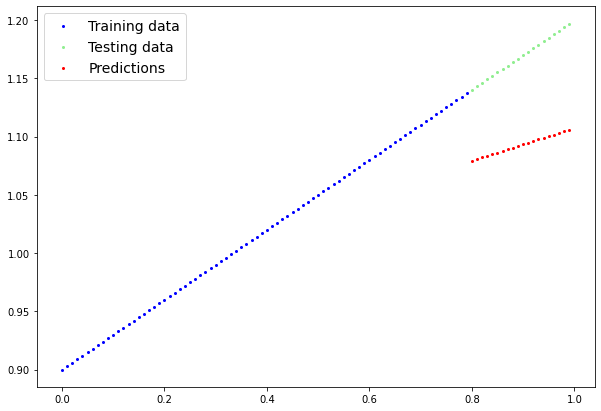

In [62]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions=y_preds.cpu())


## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [63]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_ex01LRmodel.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=ex01LRmodel.state_dict(), 
           # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_ex01LRmodel.pth


In [64]:
# Create new instance of model and load saved state dict 
# (make sure to put it on the target device)
loaded_ex01LRmodel = LinearRegressionModel()
loaded_ex01LRmodel.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_ex01LRmodel.to(device)

print(f"Loaded model:\n{loaded_ex01LRmodel}")
print(f"Model on device:\n{next(loaded_ex01LRmodel.parameters()).device}")

Loaded model:
LinearRegressionModel()
Model on device:
cuda:0


In [67]:
# Make predictions with loaded model and compare them to the previous
loaded_ex01LRmodel.eval()

# Make predictions on the test data
with torch.inference_mode():
    loaded_y_preds = loaded_ex01LRmodel(X_test)
y_preds == loaded_y_preds

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True], device='cuda:0')